In [52]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
from bs4 import BeautifulSoup
import numpy as np
%matplotlib inline

In [94]:
df = pd.read_excel("selected_judges.xlsx")
df=df.rename(columns={'Appointing President' : 'president', 'type' : 'court_type', 'Party of Appointing President':'party', 'Appointment Title' :'title'})


In [49]:
df.shape

(1258, 38)

In [4]:
df.president.value_counts()

William J. Clinton    357
George W. Bush        310
Barack Obama          308
George H.W. Bush      169
Donald J. Trump       114
Name: president, dtype: int64

In [5]:
trump_nominees = df[df['Confirmation Date'] > '2017-01-21'].nid.count()
obama_nominees_t2 = df[(df.president == 'Barack Obama') & ('2013-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2015-06-30')].nid.count()
obama_nominees_t1 = df[(df.president == 'Barack Obama') & ('2009-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2012-06-30')].nid.count()
bush_nominees_t2 = df[(df.president == 'George W. Bush') & ('2005-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2008-06-30')].nid.count()
bush_nominees_t1 = df[(df.president == 'George W. Bush') & ('2001-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2004-06-30')].nid.count()
clinton_nominees_t2 = df[(df.president == 'William J. Clinton') & ('1997-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2000-06-30')].nid.count()
clinton_nominees_t1 = df[(df.president == 'William J. Clinton') & ('1993-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '1996-06-30')].nid.count()
Hbush = df[(df.president == 'George H.W. Bush') & ('1989-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '1992-06-30')].nid.count()

judges = print(trump_nominees, obama_nominees_t2, obama_nominees_t1, bush_nominees_t2, bush_nominees_t1, clinton_nominees_t2, clinton_nominees_t1, Hbush)

114 134 137 102 187 151 176 144


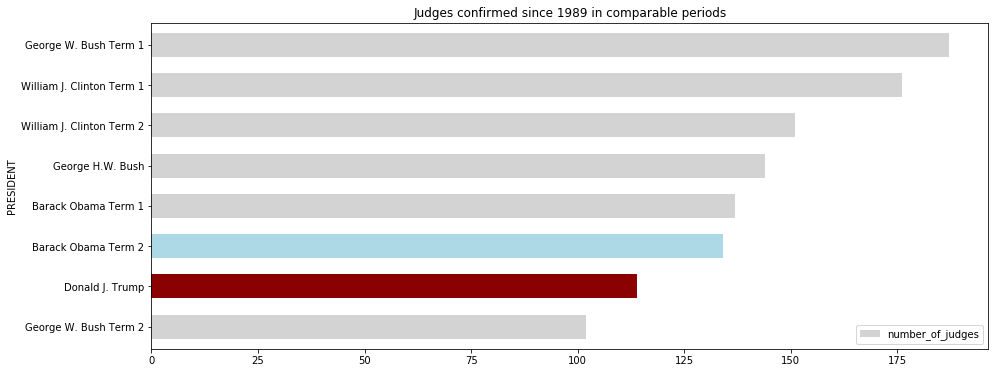

In [17]:
list = [{'PRESIDENT':'Donald J. Trump', 'number_of_judges' : '114'},
        {'PRESIDENT': 'Barack Obama Term 2', 'number_of_judges' : '134'},
        {'PRESIDENT': 'Barack Obama Term 1', 'number_of_judges' : '137'},
        {'PRESIDENT': 'George W. Bush Term 2', 'number_of_judges' : '102'},
        {'PRESIDENT': 'George W. Bush Term 1', 'number_of_judges' : '187'},
        {'PRESIDENT': 'William J. Clinton Term 2', 'number_of_judges' : '151'},
        {'PRESIDENT': 'William J. Clinton Term 1', 'number_of_judges' : '176'},
        {'PRESIDENT': 'George H.W. Bush', 'number_of_judges' : '144'}]

df1 = pd.DataFrame(list)
df1['number_of_judges'] = df1.number_of_judges.astype(float)

colors = ['lightgrey', 'darkred', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
ax = df1.sort_values(by='number_of_judges').plot(x='PRESIDENT', y= 'number_of_judges', kind='barh', figsize = (15,6), color=colors, width=0.6)
ax = ax.set_title("Judges confirmed since 1989 in comparable periods")

plt.savefig("judges_confirmed.pdf")


In [8]:
trump_nominees = df[df['Confirmation Date'] > '2017-01-21'].nid.count()
obama_nominees_t2 = df[(df.president == 'Barack Obama') & ('2013-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2017-01-21')].nid.count()
obama_nominees_t1 = df[(df.president == 'Barack Obama') & ('2009-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2013-01-21')].nid.count()
bush_nominees_t2 = df[(df.president == 'George W. Bush') & ('2005-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2009-01-21')].nid.count()
bush_nominees_t1 = df[(df.president == 'George W. Bush') & ('2001-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2005-01-21')].nid.count()
clinton_nominees_t2 = df[(df.president == 'William J. Clinton') & ('1997-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2001-01-21')].nid.count()
clinton_nominees_t1 = df[(df.president == 'William J. Clinton') & ('1993-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '1997-01-21')].nid.count()
Hbush = df[(df.president == 'George H.W. Bush') & ('1989-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '1993-01-21')].nid.count()

judges = print(trump_nominees, obama_nominees_t2, obama_nominees_t1, bush_nominees_t2, bush_nominees_t1, clinton_nominees_t2, clinton_nominees_t1, Hbush)

114 151 157 116 194 163 193 169


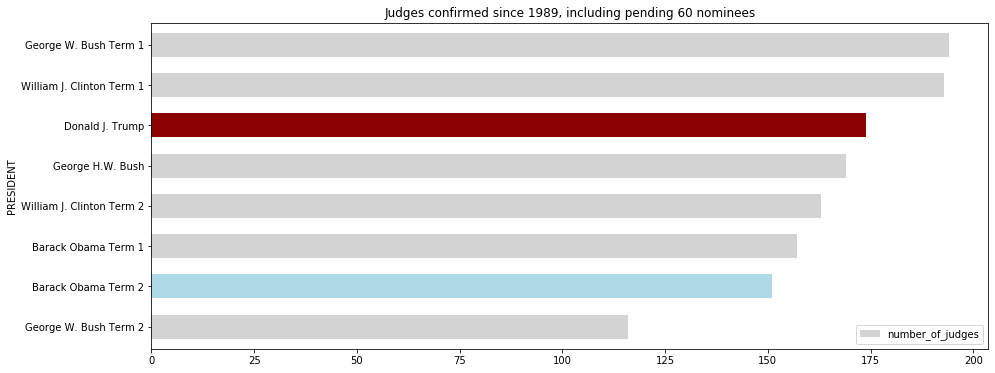

In [18]:
list1 = [{'PRESIDENT':'Donald J. Trump', 'number_of_judges' : '174'},
        {'PRESIDENT': 'Barack Obama Term 2', 'number_of_judges' : '151'},
        {'PRESIDENT': 'Barack Obama Term 1', 'number_of_judges' : '157'},
        {'PRESIDENT': 'George W. Bush Term 2', 'number_of_judges' : '116'},
        {'PRESIDENT': 'George W. Bush Term 1', 'number_of_judges' : '194'},
        {'PRESIDENT': 'William J. Clinton Term 2', 'number_of_judges' : '163'},
        {'PRESIDENT': 'William J. Clinton Term 1', 'number_of_judges' : '193'},
        {'PRESIDENT': 'George H.W. Bush', 'number_of_judges' : '169'}]

df2 = pd.DataFrame(list1)
df2['number_of_judges'] = df2.number_of_judges.astype(float)

colors = ['lightgrey', 'lightblue', 'lightgrey', 'lightgrey', 'lightgrey', 'darkred', 'lightgrey', 'lightgrey']
ax = df2.sort_values(by='number_of_judges').plot(x='PRESIDENT', y= 'number_of_judges', kind='barh', figsize = (15,6), color=colors, width=0.6)
ax.set_title("Judges confirmed since 1989, including pending 60 nominees")

plt.savefig("judges_confirmed_assumed.pdf")

In [39]:
trump_d= df[df['Confirmation Date'] > '2017-01-21'].conf_duration.median()
obama_d_t2 = df[(df.president == 'Barack Obama') & ('2013-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2017-01-21')].conf_duration.median()
obama_d_t1 = df[(df.president == 'Barack Obama') & ('2009-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2013-01-21')].conf_duration.median()
bush_d_t2 = df[(df.president == 'George W. Bush') & ('2005-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2009-01-21')].conf_duration.median()
bush_d_t1 = df[(df.president == 'George W. Bush') & ('2001-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2005-01-21')].conf_duration.median()
clinton_d_t2 = df[(df.president == 'William J. Clinton') & ('1997-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2001-01-21')].conf_duration.median()
clinton_d_t1 = df[(df.president == 'William J. Clinton') & ('1993-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '1997-01-21')].conf_duration.median()
Hbush_d = df[(df.president == 'George H.W. Bush') & ('1989-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '1993-01-21')].conf_duration.median()
print(trump_d, obama_d_t2, obama_d_t1, bush_d_t2, bush_d_t1, clinton_d_t2, clinton_d_t1, Hbush_d)


147 days 00:00:00 138 days 00:00:00 207 days 00:00:00 118 days 12:00:00 125 days 00:00:00 135 days 00:00:00 84 days 00:00:00 93 days 00:00:00


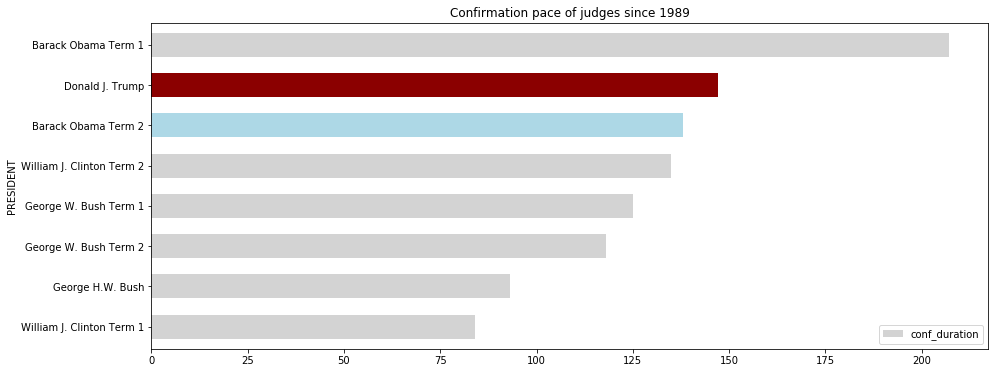

In [46]:
list = [{'PRESIDENT':'Donald J. Trump', 'conf_duration' : '147'},
        {'PRESIDENT': 'Barack Obama Term 2', 'conf_duration' : '138'},
        {'PRESIDENT': 'Barack Obama Term 1', 'conf_duration' : '207'},
        {'PRESIDENT': 'George W. Bush Term 2', 'conf_duration' : '118'},
        {'PRESIDENT': 'George W. Bush Term 1', 'conf_duration' : '125'},
        {'PRESIDENT': 'William J. Clinton Term 2', 'conf_duration' : '135'},
        {'PRESIDENT': 'William J. Clinton Term 1', 'conf_duration' : '84'},
        {'PRESIDENT': 'George H.W. Bush', 'conf_duration' : '93'}]
df3 = pd.DataFrame(list)
df3['conf_duration'] = df3.conf_duration.astype(float)

colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightblue', 'darkred', 'lightgrey']
ax = df3.sort_values(by='conf_duration').plot(x='PRESIDENT', y= 'conf_duration', kind='barh', figsize = (15,6), color=colors, width=0.6)
ax.set_title("Confirmation pace of judges since 1989")

plt.savefig("confirmation_pace.pdf")

In [111]:
trump_A= df[(df['Confirmation Date'] > '2017-01-21') & (df.court_type == 'U.S. Court of Appeals')].president.count()
obama_A_t2 = df[('2013-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2017-01-21') & (df.court_type == 'U.S. Court of Appeals')].president.count()
obama_A_t1 = df[('2009-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2013-01-21') & (df.court_type == 'U.S. Court of Appeals')].president.count()
bush_A_t2 = df[('2005-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2009-01-21') & (df.court_type == 'U.S. Court of Appeals')].president.count()
bush_A_t1 = df[('2001-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2005-01-21') & (df.court_type == 'U.S. Court of Appeals')].president.count()
clinton_A_t2 = df[('1997-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '2001-01-21') & (df.court_type == 'U.S. Court of Appeals')].president.count()
clinton_A_t1 = df[('1993-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '1997-01-21') & (df.court_type == 'U.S. Court of Appeals')].president.count()
Hbush_A = df[('1989-01-21' < df['Confirmation Date']) & (df['Confirmation Date'] < '1993-01-21') & (df.court_type == 'U.S. Court of Appeals')].president.count()

print(trump_A, obama_A_t2, obama_A_t1, bush_A_t2, bush_A_t1, clinton_A_t2, clinton_A_t1, Hbush_A)


34 20 15 22 26 24 22 20


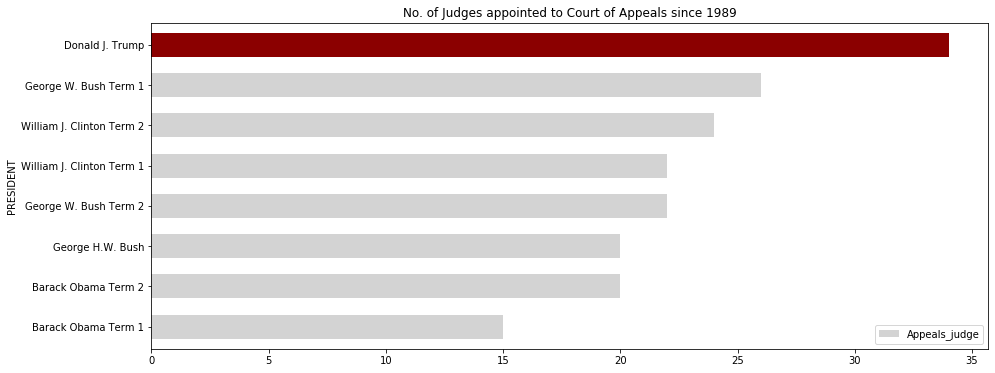

In [124]:
list = [{'PRESIDENT':'Donald J. Trump', 'Appeals_judge' : '34'},
        {'PRESIDENT': 'Barack Obama Term 2', 'Appeals_judge' : '20'},
        {'PRESIDENT': 'Barack Obama Term 1', 'Appeals_judge' : '15'},
        {'PRESIDENT': 'George W. Bush Term 2', 'Appeals_judge' : '22'},
        {'PRESIDENT': 'George W. Bush Term 1', 'Appeals_judge' : '26'},
        {'PRESIDENT': 'William J. Clinton Term 2', 'Appeals_judge' : '24'},
        {'PRESIDENT': 'William J. Clinton Term 1', 'Appeals_judge' : '22'},
        {'PRESIDENT': 'George H.W. Bush', 'Appeals_judge' : '20'}]
df4 = pd.DataFrame(list)
df4['Appeals_judge'] = df4.Appeals_judge.astype(float)
df4.dtypes

colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'darkred']
ax = df4.sort_values(by='Appeals_judge').plot(x='PRESIDENT', y= 'Appeals_judge', kind='barh', figsize = (15,6), color=colors, width=0.6)
ax.set_title("No. of Judges appointed to Court of Appeals since 1989")

plt.savefig("Appeals_judge.pdf")
